# Simulaciones

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import matplotlib.cm as cm
import rie_estimator

## Función para generar dinámicamente una matriz en bloques (diagonales son cero)

In [4]:
def make_corr_matrix(groups: list, corrs: list)->np.ndarray:
    mat_holder = np.zeros(shape=(sum(groups), sum(groups)))
    for index,group in enumerate(groups):
        if index == 0:
            myrange = list(range(0, group))
            index_i = 0
            index_j = 0
            for index_i in myrange:
                for index_j in myrange:
                    mat_holder[index_i, index_j] = corrs[index]
        else:
            myrange = list(range(sum(groups[:index]), sum(groups[:index+1])))
            for index_i in myrange:
                for index_j in myrange:
                    mat_holder[index_i, index_j] = corrs[index]
    np.fill_diagonal(mat_holder, 1.0)
    return mat_holder

### ejemplos

In [46]:
make_corr_matrix([4,2,2], [0.2, 0.3,0.4])

array([[1. , 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. ],
       [0.2, 1. , 0.2, 0.2, 0. , 0. , 0. , 0. ],
       [0.2, 0.2, 1. , 0.2, 0. , 0. , 0. , 0. ],
       [0.2, 0.2, 0.2, 1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 0.3, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.3, 1. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0.4],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.4, 1. ]])

In [47]:
make_corr_matrix([5, 2, 3], [0.1, 0.3, 0.7])

array([[1. , 0.1, 0.1, 0.1, 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0.1, 1. , 0.1, 0.1, 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0.1, 0.1, 1. , 0.1, 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0.1, 0.1, 0.1, 1. , 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0.1, 0.1, 0.1, 0.1, 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. , 0.3, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.3, 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0.7, 0.7],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.7, 1. , 0.7],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.7, 0.7, 1. ]])

## Simulando retornos a través de cholensky

In [82]:
#corr_matrix = make_corr_matrix([70, 50, 20, 35, 25, 40, 50, 50 , 20, 40], [0.3, 0.5, 0.8, 0.2, 0.3, 0.2, 0.7, 0.5, 0.3, 0.4])
#number_of_obs = 500
corr_matrix = make_corr_matrix([140, 100, 40, 70, 50, 80, 100, 100 , 40, 80], [0.3, 0.5, 0.8, 0.2, 0.3, 0.2, 0.7, 0.5, 0.3, 0.4])
number_of_obs = 900
number_of_assets = corr_matrix.shape[0]
# En caso de que la matriz sea distinta de cero 
#means = np.zeros(number_of_assets)
Means = np.full((number_of_obs, number_of_assets), 0)

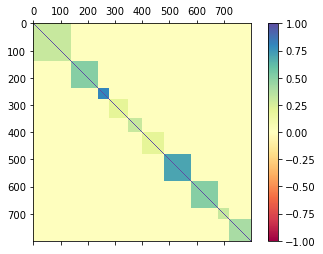

In [72]:
fig, axs = plt.subplots(1,1)
#fig.set_size_inches(18.5, 10.5)
caxs = axs.matshow(corr_matrix, vmin=-1, vmax=1, cmap = cm.Spectral)
fig.colorbar(caxs)

In [83]:
Z = np.random.normal(size = number_of_assets * number_of_obs)
Z.shape

(720000,)

In [84]:
Z = Z.reshape((number_of_assets,number_of_obs))
Z.shape

(800, 900)

In [85]:
L = np.linalg.cholesky(corr_matrix)
L.shape

(800, 800)

In [86]:
daily_returns =  Means.T + np.inner(L, np.transpose(Z))

In [87]:
sample_corr = np.corrcoef(daily_returns)

In [88]:
rie_corr = rie_estimator.get_rie(returns=daily_returns.T, normalize=False, max_ones= False)

In [57]:
daily_returns.min()

-4.386391558329296

In [58]:
daily_returns.mean()

-0.0019285937858964848

In [59]:
daily_returns.max()

4.554057536089456

<AxesSubplot:ylabel='Density'>

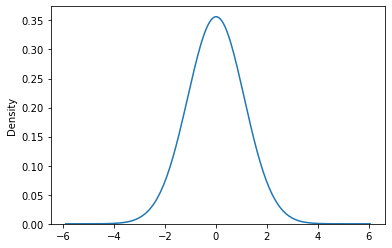

In [60]:
sns.kdeplot(daily_returns.flatten(), bw_method=0.5, fill=False, alpha = 1)

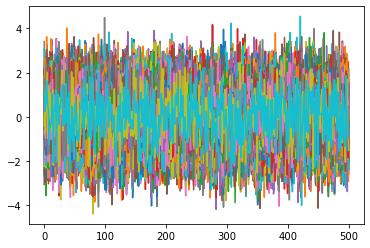

In [61]:
plt.plot(daily_returns.T);

In [62]:
daily_returns.shape

(400, 500)

Mostrando el estimador de correlación muestral

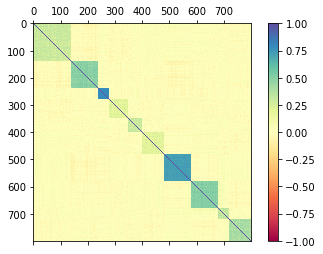

In [80]:
fig, axs = plt.subplots(1,1)
#fig.set_size_inches(18.5, 10.5)
caxs = axs.matshow(sample_corr, vmin=-1, vmax=1, cmap = cm.Spectral)
fig.colorbar(caxs)

Mostrando el estimador de correlación del RIE:

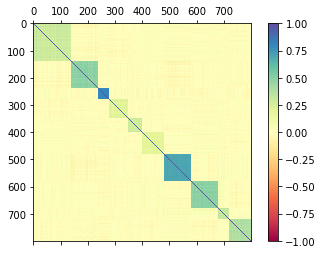

In [81]:
fig, axs = plt.subplots(1,1)
#fig.set_size_inches(18.5, 10.5)
caxs = axs.matshow(rie_corr, vmin=-1, vmax=1, cmap = cm.Spectral)
fig.colorbar(caxs)

In [92]:
print(np.linalg.norm(((corr_matrix - sample_corr)), ord = "fro"))
print(np.linalg.norm(((corr_matrix- rie_corr)), ord = "fro"))

26.675818689701984
22.463771060267472


## TODO
- Distancia de frobenius promedio (sobre distintas realizaciones)
- Gráfica de mapeo de los valores propios ( es equivalente)
- Se pueden mostrar escenarios distintos (tanto en el número de bloques, q)

## Simulando retornos con una normal mutlivariada

In [5]:
#corr_matrix = make_corr_matrix([70, 50, 20, 35, 25, 40, 50, 50 , 20, 40], [0.3, 0.5, 0.8, 0.2, 0.3, 0.2, 0.7, 0.5, 0.3, 0.4])
corr_matrix = make_corr_matrix([140, 100, 40, 70, 50, 80, 100, 100 , 40, 80], [0.3, 0.5, 0.8, 0.2, 0.3, 0.2, 0.7, 0.5, 0.3, 0.4])

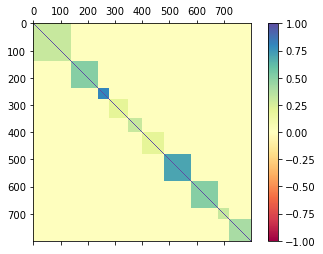

In [122]:
fig, axs = plt.subplots(1,1)
#fig.set_size_inches(18.5, 10.5)
caxs = axs.matshow(corr_matrix, vmin=-1, vmax=1, cmap = cm.Spectral)
fig.colorbar(caxs)

In [6]:
daily_returns = np.random.multivariate_normal(mean = np.zeros(corr_matrix.shape[0]), cov = corr_matrix, size=900)

In [97]:
daily_returns.shape

(900, 800)

In [7]:
est_corr = np.corrcoef(daily_returns.T)

In [8]:
rie_corr = rie_estimator.get_rie(returns=daily_returns, normalize=False, max_ones= False)

<AxesSubplot:ylabel='Density'>

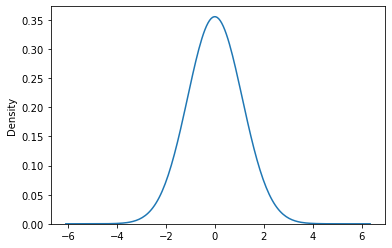

In [9]:
sns.kdeplot(daily_returns.flatten(), bw_method=0.5, fill=False, alpha = 1)

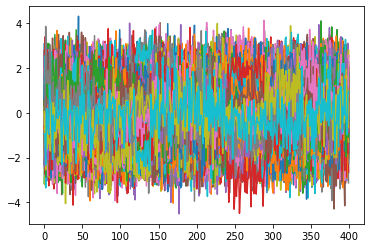

In [70]:
plt.plot(daily_returns.T);

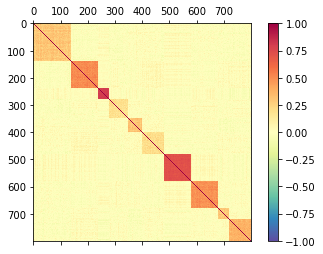

In [10]:
fig, axs = plt.subplots(1,1)
#fig.set_size_inches(18.5, 10.5)
caxs = axs.matshow(est_corr, vmin=-1, vmax=1, cmap = cm.Spectral_r)
fig.colorbar(caxs)

# cambiar colores de los heatmaps

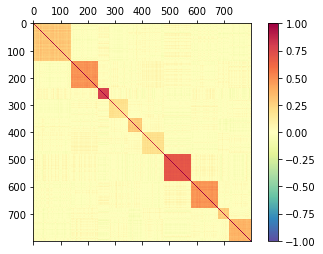

In [11]:
fig, axs = plt.subplots(1,1)
#fig.set_size_inches(18.5, 10.5)
caxs = axs.matshow(rie_corr, vmin=-1, vmax=1, cmap = cm.Spectral_r)
fig.colorbar(caxs)

# cambiar colores de los heatmaps

In [12]:
print(np.linalg.norm(((corr_matrix - est_corr)), ord = "fro"))
print(np.linalg.norm(((corr_matrix- rie_corr)), ord = "fro"))

26.066902113034978
21.023374237770376


In [47]:
eigen_true = np.linalg.eigvalsh(corr_matrix)
eigen_sample = np.linalg.eigvalsh(est_corr)
eigen_rie = np.linalg.eigvalsh(rie_corr)
eigen_true.sort()
eigen_sample.sort()
eigen_rie.sort()


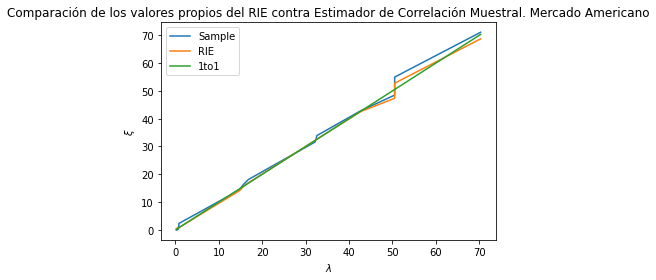

In [57]:
fig, ax = plt.subplots(1,1)
ax.plot(eigen_true,eigen_sample)
ax.plot(eigen_true,eigen_rie)
ax.plot(eigen_true,eigen_true)
#ax = sns.lineplot(x = eigen_true, y = eigen_sample)
#ax = sns.lineplot(x = eigen_true, y = eigen_rie)
plt.title("Comparación de los valores propios del RIE contra Estimador de Correlación Muestral. Mercado Americano")
plt.legend(labels=['Sample', 'RIE', "1to1"])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()


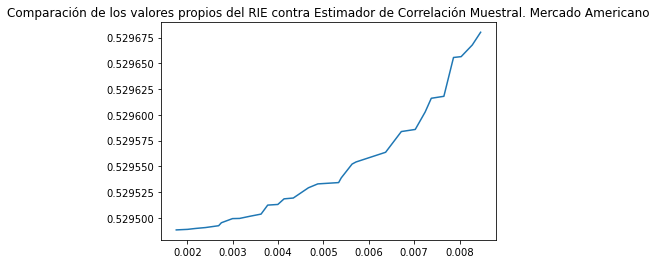

In [22]:
ax = sns.lineplot(x = eigen_sample[:30], y = eigen_rie[:30])
plt.title("Comparación de los valores propios del RIE contra Estimador de Correlación Muestral. Mercado Americano")
plt.show()


In [23]:
corr_matrix = make_corr_matrix([140, 100, 40, 70, 50, 80, 100, 100 , 40, 80], [0.3, 0.5, 0.8, 0.2, 0.3, 0.2, 0.7, 0.5, 0.3, 0.4])
num_obs = 900
num_simul = 10

In [41]:
frob_muestral = []
frob_rie = []
vals_propios_muestral = []
vals_propios_rie = []
for simul in range(num_simul):
    # Generación de retornos
    daily_returns = np.random.multivariate_normal(mean = np.zeros(corr_matrix.shape[0]), cov = corr_matrix, size=num_obs)
    # Estimador de correlación muestral
    est_corr = np.corrcoef(daily_returns.T)
    # Estimador RIE
    rie_corr = rie_estimator.get_rie(returns=daily_returns, normalize=False, max_ones= False)
    # Calcular distancias frobenius
    frob_muestral.append(np.linalg.norm(((corr_matrix - est_corr)), ord = "fro"))
    frob_rie.append(np.linalg.norm(((corr_matrix - rie_corr)), ord = "fro"))
    # Sacar valores propios
    eigen_sample = np.linalg.eigvalsh(est_corr)
    eigen_rie = np.linalg.eigvalsh(rie_corr)
    eigen_sample.sort()
    eigen_rie.sort()
    vals_propios_muestral.append(eigen_sample)
    vals_propios_rie.append(eigen_rie)

In [25]:
np.mean(frob_muestral)

26.366848216355145

In [26]:
np.mean(frob_rie)

21.876766831258344

In [27]:
vals_propios_muestral = np.array(vals_propios_muestral)
vals_propios_rie = np.array(vals_propios_rie)
vals_propios_muestral.shape

(10, 800)

In [28]:
means_vals_propios_muestral = vals_propios_muestral.mean(axis = 0)
means_vals_propios_rie = vals_propios_rie.mean(axis = 0)
means_vals_propios_muestral.sort()
means_vals_propios_rie.sort()

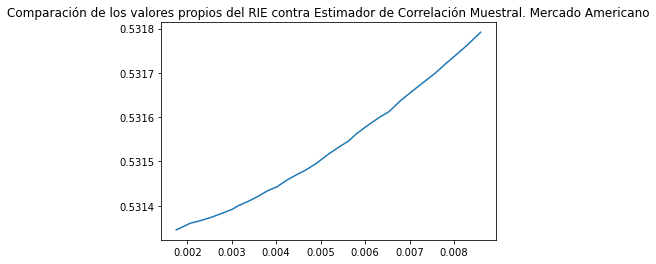

In [30]:
ax = sns.lineplot(x = means_vals_propios_muestral[:30], y = means_vals_propios_rie[:30])
plt.title("Comparación de los valores propios del RIE contra Estimador de Correlación Muestral. Mercado Americano")
plt.show()


In [31]:
means_vals_propios_rie.min()

0.5313454585916971

In [32]:
eigen_true.min()

0.19999999999999643

In [33]:
means_vals_propios_muestral.min()

0.001752555027060052

In [45]:
means_vals_propios_rie[:10]

array([0.53134546, 0.53136054, 0.53136644, 0.53137408, 0.5313815 ,
       0.53139243, 0.53140041, 0.53141088, 0.53142091, 0.53143366])

In [43]:
eigen_sample[:10]

array([0.00193828, 0.00203638, 0.0023427 , 0.00253913, 0.00284759,
       0.00298768, 0.00338273, 0.00363113, 0.00383378, 0.00388848])

In [34]:
eigen_true[:10]

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])

In [35]:
means_vals_propios_muestral[:10]

array([0.00175256, 0.00206506, 0.00229788, 0.00254547, 0.00274358,
       0.00302048, 0.00315468, 0.00339002, 0.00358697, 0.00380056])

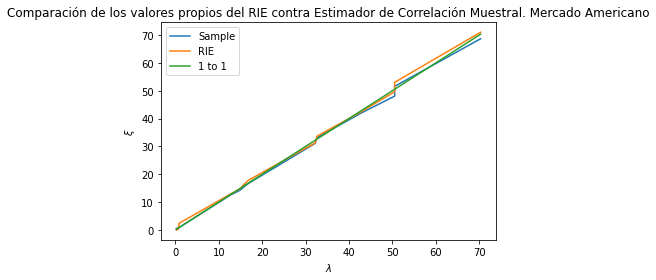

In [58]:
fig, ax = plt.subplots(1,1)
ax.plot( eigen_true, means_vals_propios_rie)
ax.plot( eigen_true, means_vals_propios_muestral)
ax.plot(eigen_true, eigen_true)
plt.title("Comparación de los valores propios del RIE contra Estimador de Correlación Muestral. Mercado Americano")
plt.legend(labels=['Sample', 'RIE', '1 to 1'])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()
